In [1]:
# Classification model code
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, accuracy_score

In [2]:
df = pd.read_parquet('fully_combined.parquet')

In [3]:
categorical_columns = df[['locationid']].columns

# Convert data type to int for these columns - gets rid of decimal place
for column in categorical_columns:
    df[column] = df[column].astype('int')
    

integer_columns = df[['ridership']].columns

# Convert data type to object for these columns
for column in integer_columns:
    df[column] = df[column].astype('int')

In [4]:
categorical_columns = df[['locationid']].columns

# Convert data type to category for these columns
for column in categorical_columns:
    df[column] = df[column].astype('category')

In [5]:
# Check the data types in each column as assigned by default.
df.dtypes

locationid                 category
transit_timestamp    datetime64[ns]
ridership                     int64
dtype: object

In [7]:
# Find the minimum and maximum ridership values
print("Minimum ridership: ", df['ridership'].min())
print("Maximum ridership: ", df['ridership'].max())

max_ridership = df['ridership'].max()

Minimum ridership:  0
Maximum ridership:  74080


In [8]:
# Count the number of rows in each specified range
#ranges = {
    #'Quiet': (0, 999),
    #'Not Too Busy': (1000, 4999),
    #'A Little Busy': (5000, 9999),
    #'Busy': (10000, 19999),
    #'Very Busy': (20000, 49999),
    #'Extremely Busy': (50000, 74080)
    #}

# Define ranges using quantiles to get more balanced distribution
quantiles = df['ridership'].quantile([0, 0.2, 0.4, 0.6, 0.8, 0.99]).values

# Max ridership is an outlier and without the following code was the only value in extremely busy
quantiles = list(quantiles) + [max_ridership]
    
# Convert quantile values to integers to get rid of decimal places
quantiles = [int(q) for q in quantiles]

# Define ranges based on quantiles
# minus 1 at the end of each quantile to avoid overlap, e.g. Quiet was 0-23 and not too busy was 23-143, meaning both contained 23
ranges = {
    'Quiet': (quantiles[0], quantiles[1]-1),
    'Not Too Busy': (quantiles[1], quantiles[2]-1),
    'A Little Busy': (quantiles[2], quantiles[3]-1),
    'Busy': (quantiles[3], quantiles[4]-1),
    'Very Busy': (quantiles[4], quantiles[5]-1),
    'Extremely Busy': (quantiles[5], quantiles[6])
    }
    
range_counts = {}
for label, (lower, upper) in ranges.items():
    count = ((df['ridership'] >= lower) & (df['ridership'] <= upper)).sum()
    range_counts[label] = count
    
print("Number of entries in each ridership range:")
for label, count in range_counts.items():
    print(f"{label}: {count}")
    
print("\n")    
print("Ranges used for each category:")
for label, (lower, upper) in ranges.items():
    print(f"{label}: {lower} - {upper}")

Number of entries in each ridership range:
Quiet: 766965
Not Too Busy: 772710
A Little Busy: 774166
Busy: 771704
Very Busy: 733433
Extremely Busy: 38578


Ranges used for each category:
Quiet: 0 - 22
Not Too Busy: 23 - 142
A Little Busy: 143 - 444
Busy: 445 - 1286
Very Busy: 1287 - 13404
Extremely Busy: 13405 - 74080


In [9]:
# Assign busyness label based on ridership value
def assign_label(ridership):
    if 0 <= ridership <= 22:
        return 'Quiet'
    elif 23 <= ridership <= 142:
        return 'Not Too Busy'
    elif 143 <= ridership <= 444:
        return 'A Little Busy'
    elif 445 <= ridership <= 1286:
        return 'Busy'
    elif 1287 <= ridership <= 13404:
        return 'Very Busy'
    elif 13405 <= ridership <= 74080:
        return 'Extremely Busy'
    else:
        raise ValueError(f"Ridership value {ridership} cannot be assigned a category.")

# Create new column 'busyness' assigning label to each ridership value
try:
    df['busyness'] = df['ridership'].apply(assign_label)
    print("Label assignment successful.")
except ValueError as e:
    print(f"Error: {str(e)}")

# Display the updated DataFrame with the new column
print(df.tail(30))

Label assignment successful.
        locationid   transit_timestamp  ridership       busyness
3857526        263 2024-05-29 18:00:00       1456      Very Busy
3857527        263 2024-05-29 19:00:00        913           Busy
3857528        263 2024-05-29 20:00:00        588           Busy
3857529        263 2024-05-29 21:00:00        439  A Little Busy
3857530        263 2024-05-29 22:00:00        337  A Little Busy
3857531        263 2024-05-29 23:00:00        197  A Little Busy
3857532        263 2024-05-30 00:00:00         60   Not Too Busy
3857533        263 2024-05-30 01:00:00         12          Quiet
3857534        263 2024-05-30 02:00:00          5          Quiet
3857535        263 2024-05-30 03:00:00          8          Quiet
3857536        263 2024-05-30 04:00:00         18          Quiet
3857537        263 2024-05-30 05:00:00         93   Not Too Busy
3857538        263 2024-05-30 06:00:00        383  A Little Busy
3857539        263 2024-05-30 07:00:00       1419      Very B

In [10]:
# Write the dataframe to a csv file
df.to_csv('combined_indexed.csv', index=False)

# Reading from updated csv file, into a data frame
df = pd.read_csv('combined_indexed.csv')

In [11]:
# Reading from updated csv file, into a data frame
df = pd.read_csv('combined_indexed.csv')

In [12]:
# Check the data types in each column as assigned by default.
df.dtypes

locationid            int64
transit_timestamp    object
ridership             int64
busyness             object
dtype: object

In [13]:
integer_columns = df[['ridership', 'locationid']].columns

# Convert data type to object for these columns
for column in integer_columns:
    df[column] = df[column].astype('int')

In [14]:
categorical_columns = df[['locationid', 'busyness']].columns

# Convert data type to category for these columns
for column in categorical_columns:
    df[column] = df[column].astype('category')

In [15]:
# Convert data type to datetime
df['transit_timestamp'] = df['transit_timestamp'].astype('datetime64[ns]')

In [16]:
# Check the data types in each column as assigned by default.
df.dtypes

locationid                 category
transit_timestamp    datetime64[ns]
ridership                     int64
busyness                   category
dtype: object

In [17]:
# Extract hour from transit_timestamp
df['hour'] = df['transit_timestamp'].dt.hour

In [18]:
# Define features
X = df[['locationid', 'hour']].copy()  # Avoid indexing error
y = df['busyness']

In [19]:
# Make busyness numeric
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.3, random_state=42)

In [21]:
# Train a logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [22]:
# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print("Classification Report:\n", classification_report(y_test, y_pred, target_names=label_encoder.classes_))
print("Accuracy Score:", accuracy_score(y_test, y_pred))

/Users/muireannoconnor/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/muireannoconnor/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/muireannoconnor/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result)

Classification Report:
                 precision    recall  f1-score   support

 A Little Busy       0.24      0.16      0.19    232037
          Busy       0.23      0.21      0.22    231319
Extremely Busy       0.00      0.00      0.00     11719
  Not Too Busy       0.29      0.37      0.33    231646
         Quiet       0.23      0.26      0.24    230439
     Very Busy       0.21      0.22      0.21    220107

      accuracy                           0.24   1157267
     macro avg       0.20      0.20      0.20   1157267
  weighted avg       0.24      0.24      0.24   1157267

Accuracy Score: 0.2419692257707167


In [23]:
# Predict busyness based on frontend input
locationid = 150
transit_timestamp = pd.to_datetime('2024-07-30 23:00:00')
hour = transit_timestamp.hour

# Create a DataFrame with the input values
input_data = pd.DataFrame({'locationid': [locationid], 'hour': [hour]})

# Make prediction
predicted_busyness_encoded = model.predict(input_data)
predicted_busyness = label_encoder.inverse_transform(predicted_busyness_encoded)

print(f'Predicted Busyness: {predicted_busyness[0]}')


Predicted Busyness: Very Busy


# Logist Regression - Model 2;

With combined weather data


In [24]:
df = pd.read_parquet('model_data_1.parquet')

In [25]:
df.head()

,locationid,ridership,time,temperature_2m (°C),precipitation (mm),rain (mm),cloudcover (%),cloudcover_low (%),cloudcover_mid (%),cloudcover_high (%),windspeed_10m (km/h),winddirection_10m (°)
0,2.0,1.0,2022-02-06 15:00:00,-5.6,0.0,0.0,11.0,0.0,0.0,35.0,6.600000,331.0
1,2.0,1.0,2022-02-16 23:00:00,5.4,0.0,0.0,29.0,0.0,0.0,97.0,12.100000,280.0
2,2.0,1.0,2022-02-23 08:00:00,13.5,0.0,0.0,44.0,8.0,11.0,100.0,16.299999,227.0
3,2.0,4.0,2022-02-23 19:00:00,17.5,0.0,0.0,22.0,5.0,2.0,54.0,21.600000,184.0
4,2.0,1.0,2022-03-22 10:00:00,7.4,0.0,0.0,20.0,0.0,30.0,8.0,10.800000,127.0


In [26]:
categorical_columns = df[['locationid']].columns

# Convert data type to int for these columns - gets rid of decimal place
for column in categorical_columns:
    df[column] = df[column].astype('int')
    

integer_columns = df[['ridership']].columns

# Convert data type to object for these columns
for column in integer_columns:
    df[column] = df[column].astype('int')

In [27]:
categorical_columns = df[['locationid']].columns

# Convert data type to category for these columns
for column in categorical_columns:
    df[column] = df[column].astype('category')

In [28]:
# Check the data types in each column as assigned by default.
df.dtypes

locationid                     category
ridership                         int64
time                     datetime64[ns]
temperature_2m (°C)             float32
precipitation (mm)              float32
rain (mm)                       float32
cloudcover (%)                  float32
cloudcover_low (%)              float32
cloudcover_mid (%)              float32
cloudcover_high (%)             float32
windspeed_10m (km/h)            float32
winddirection_10m (°)           float32
dtype: object

In [31]:
# Check just how many rows:
print("number of rows: ", df.shape[0])

number of rows:  2143060


In [32]:
#Print the number of duplicates, without the original rows that were duplicated
print('Number of duplicate (excluding first) rows in the table is: ', df.duplicated().sum())

Number of duplicate (excluding first) rows in the table is:  391422


In [33]:
df.isnull().sum()

locationid                    0
ridership                     0
time                     634050
temperature_2m (°C)      634050
precipitation (mm)       634050
rain (mm)                634050
cloudcover (%)           634050
cloudcover_low (%)       634050
cloudcover_mid (%)       634050
cloudcover_high (%)      634050
windspeed_10m (km/h)     634050
winddirection_10m (°)    634050
dtype: int64

In [34]:
df=df.dropna()

In [35]:
df.isnull().sum()

locationid               0
ridership                0
time                     0
temperature_2m (°C)      0
precipitation (mm)       0
rain (mm)                0
cloudcover (%)           0
cloudcover_low (%)       0
cloudcover_mid (%)       0
cloudcover_high (%)      0
windspeed_10m (km/h)     0
winddirection_10m (°)    0
dtype: int64

In [37]:
df.shape

(1509010, 12)

In [38]:
#Print the number of duplicates, without the original rows that were duplicated
print('Number of duplicate (excluding first) rows in the table is: ', df.duplicated().sum())

Number of duplicate (excluding first) rows in the table is:  0


In [39]:
# Check the data types in each column as assigned by default.
df.dtypes

locationid                     category
ridership                         int64
time                     datetime64[ns]
temperature_2m (°C)             float32
precipitation (mm)              float32
rain (mm)                       float32
cloudcover (%)                  float32
cloudcover_low (%)              float32
cloudcover_mid (%)              float32
cloudcover_high (%)             float32
windspeed_10m (km/h)            float32
winddirection_10m (°)           float32
dtype: object

In [40]:
# Print table with continuous statistics
df.select_dtypes(include=['int64']).describe().T

,count,mean,std,min,25%,50%,75%,max
ridership,1509010.0,980.604396,2391.59509,0.0,34.0,235.0,884.0,56482.0


In [41]:
# Find the minimum and maximum ridership values
print("Minimum ridership: ", df['ridership'].min())
print("Maximum ridership: ", df['ridership'].max())

max_ridership = df['ridership'].max()

Minimum ridership:  0
Maximum ridership:  56482


In [42]:
# Count the number of rows in each specified range
#ranges = {
    #'Quiet': (0, 999),
    #'Not Too Busy': (1000, 4999),
    #'A Little Busy': (5000, 9999),
    #'Busy': (10000, 19999),
    #'Very Busy': (20000, 49999),
    #'Extremely Busy': (50000, 74080)
    #}

# Define ranges using quantiles to get more balanced distribution
quantiles = df['ridership'].quantile([0, 0.2, 0.4, 0.6, 0.8, 0.99]).values

# Max ridership is an outlier and without the following code was the only value in extremely busy
quantiles = list(quantiles) + [max_ridership]
    
# Convert quantile values to integers to get rid of decimal places
quantiles = [int(q) for q in quantiles]

# Define ranges based on quantiles
# minus 1 at the end of each quantile to avoid overlap, e.g. Quiet was 0-23 and not too busy was 23-143, meaning both contained 23
ranges = {
    'Quiet': (quantiles[0], quantiles[1]-1),
    'Not Too Busy': (quantiles[1], quantiles[2]-1),
    'A Little Busy': (quantiles[2], quantiles[3]-1),
    'Busy': (quantiles[3], quantiles[4]-1),
    'Very Busy': (quantiles[4], quantiles[5]-1),
    'Extremely Busy': (quantiles[5], quantiles[6])
    }
    
range_counts = {}
for label, (lower, upper) in ranges.items():
    count = ((df['ridership'] >= lower) & (df['ridership'] <= upper)).sum()
    range_counts[label] = count
    
print("Number of entries in each ridership range:")
for label, count in range_counts.items():
    print(f"{label}: {count}")
    
print("\n")    
print("Ranges used for each category:")
for label, (lower, upper) in ranges.items():
    print(f"{label}: {lower} - {upper}")

Number of entries in each ridership range:
Quiet: 300506
Not Too Busy: 302911
A Little Busy: 301461
Busy: 302214
Very Busy: 286826
Extremely Busy: 15092


Ranges used for each category:
Quiet: 0 - 16
Not Too Busy: 17 - 128
A Little Busy: 129 - 401
Busy: 402 - 1178
Very Busy: 1179 - 11979
Extremely Busy: 11980 - 56482


In [43]:
# Assign busyness label based on ridership value
def assign_label(ridership):
    if 0 <= ridership <= 16:
        return 'Quiet'
    elif 17 <= ridership <= 128:
        return 'Not Too Busy'
    elif 129 <= ridership <= 401:
        return 'A Little Busy'
    elif 402 <= ridership <= 1178:
        return 'Busy'
    elif 1179 <= ridership <= 11979:
        return 'Very Busy'
    elif 11980 <= ridership <= 56482:
        return 'Extremely Busy'
    else:
        raise ValueError(f"Ridership value {ridership} cannot be assigned a category.")

# Create new column 'busyness' assigning label to each ridership value
try:
    df['busyness'] = df['ridership'].apply(assign_label)
    print("Label assignment successful.")
except ValueError as e:
    print(f"Error: {str(e)}")

# Display the updated DataFrame with the new column
print(df.tail(30))

Label assignment successful.
        locationid  ridership                time  temperature_2m (°C)  \
2139407        263       1492 2022-12-30 18:00:00                  3.2   
2139408        263       1326 2022-12-30 19:00:00                  3.7   
2139409        263        981 2022-12-30 20:00:00                  4.0   
2139410        263        813 2022-12-30 21:00:00                  4.1   
2139411        263        683 2022-12-30 22:00:00                  3.8   
2139412        263        593 2022-12-30 23:00:00                  3.6   
2139413        263        368 2022-12-31 00:00:00                  3.7   
2139414        263        193 2022-12-31 01:00:00                  3.7   
2139415        263        163 2022-12-31 02:00:00                  3.6   
2139416        263         91 2022-12-31 03:00:00                  4.3   
2139417        263         72 2022-12-31 04:00:00                  4.6   
2139418        263         26 2022-12-31 05:00:00                  5.1   
2139419  

In [44]:
# Write the dataframe to a csv file
df.to_csv('model_data_1_indexed.csv', index=False)

# Reading from updated csv file, into a data frame
df = pd.read_csv('model_data_1_indexed.csv')

In [127]:
# Reading from updated csv file, into a data frame
df = pd.read_csv('model_data_1_indexed.csv')

In [128]:
# Check the data types in each column as assigned by default.
df.dtypes

locationid                 int64
ridership                  int64
time                      object
temperature_2m (°C)      float64
precipitation (mm)       float64
rain (mm)                float64
cloudcover (%)           float64
cloudcover_low (%)       float64
cloudcover_mid (%)       float64
cloudcover_high (%)      float64
windspeed_10m (km/h)     float64
winddirection_10m (°)    float64
busyness                  object
dtype: object

In [129]:
integer_columns = df[['ridership', 'locationid']].columns

# Convert data type to object for these columns
for column in integer_columns:
    df[column] = df[column].astype('int')

In [130]:
categorical_columns = df[['locationid', 'busyness']].columns

# Convert data type to category for these columns
for column in categorical_columns:
    df[column] = df[column].astype('category')

In [131]:
# Convert data type to datetime
df['time'] = df['time'].astype('datetime64[ns]')

In [132]:
# Check the data types in each column as assigned by default.
df.dtypes

locationid                     category
ridership                         int64
time                     datetime64[ns]
temperature_2m (°C)             float64
precipitation (mm)              float64
rain (mm)                       float64
cloudcover (%)                  float64
cloudcover_low (%)              float64
cloudcover_mid (%)              float64
cloudcover_high (%)             float64
windspeed_10m (km/h)            float64
winddirection_10m (°)           float64
busyness                       category
dtype: object

In [133]:
# Extract hour from transit_timestamp
df['hour'] = df['time'].dt.hour

In [66]:
# Define features - y = target feature
features = ['locationid', 'hour', 'temperature_2m (°C)', 'precipitation (mm)', 'rain (mm)', 'cloudcover (%)', 
            'cloudcover_low (%)', 'cloudcover_mid (%)', 'cloudcover_high (%)', 'windspeed_10m (km/h)', 'winddirection_10m (°)']

X = df[features].copy()  # Avoid indexing error
y = df['busyness']

In [67]:
# Make busyness numeric
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

In [68]:
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.3, random_state=2)

In [97]:
print("Original dataset range is: ", df.shape[0])
print("Training data (70%): ", X_train.shape[0], " rows")
print("Test data (30%): ", X_test.shape[0], " rows")

Original dataset range is:  1509010
Training data (70%):  1056307  rows
Test data (30%):  452703  rows


In [69]:
# Train a logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

/Users/muireannoconnor/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

In [70]:
# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print("Classification Report:\n", classification_report(y_test, y_pred, target_names=label_encoder.classes_))
print("Accuracy Score:", accuracy_score(y_test, y_pred))

/Users/muireannoconnor/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/muireannoconnor/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Classification Report:
                 precision    recall  f1-score   support

 A Little Busy       0.24      0.15      0.18     90349
          Busy       0.24      0.21      0.23     90824
Extremely Busy       0.00      0.00      0.00      4527
  Not Too Busy       0.35      0.55      0.43     91001
         Quiet       0.19      0.17      0.18     90173
     Very Busy       0.22      0.24      0.23     85829

      accuracy                           0.26    452703
     macro avg       0.21      0.22      0.21    452703
  weighted avg       0.24      0.26      0.25    452703

Accuracy Score: 0.2613324850950844


/Users/muireannoconnor/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [71]:
# Function to predict busyness with weather data as input
def predict_busyness(model, locationid, transit_timestamp, temperature, precipitation, rain, cloudcover, 
                     cloudcover_low, cloudcover_mid, cloudcover_high, windspeed, winddirection):
    # Create a DataFrame with the input values
    hour = pd.to_datetime(transit_timestamp).hour
    input_data = pd.DataFrame({
        'locationid': [locationid], 
        'hour': [hour],
        'temperature_2m (°C)': [temperature],
        'precipitation (mm)': [precipitation],
        'rain (mm)': [rain],
        'cloudcover (%)': [cloudcover],
        'cloudcover_low (%)': [cloudcover_low],
        'cloudcover_mid (%)': [cloudcover_mid],
        'cloudcover_high (%)': [cloudcover_high],
        'windspeed_10m (km/h)': [windspeed],
        'winddirection_10m (°)': [winddirection]
    })

    # Make prediction
    predicted_busyness_encoded = model.predict(input_data)
    predicted_busyness = label_encoder.inverse_transform(predicted_busyness_encoded)

    return predicted_busyness[0]


In [96]:
# Example input values
locationid = 150
transit_timestamp = '2024-07-30 20:00:00'
temperature = 25.0
precipitation = 0.0
rain = 0.0
cloudcover = 50.0
cloudcover_low = 20.0
cloudcover_mid = 15.0
cloudcover_high = 15.0
windspeed = 10.0
winddirection = 180.0

# Predict busyness
predicted_busyness = predict_busyness(
    model, locationid, transit_timestamp, temperature, precipitation, rain, cloudcover, 
    cloudcover_low, cloudcover_mid, cloudcover_high, windspeed, winddirection)

print(f'Predicted Busyness: {predicted_busyness}')

Predicted Busyness: Very Busy


## Correlations

Accuracy of above models terrible. Look at correlations and try to improve

In [134]:
df.shape

(1509010, 14)

Split into Training and Test data

In [135]:
# Target feature
y = df['busyness']
y.head()


0    Quiet
1    Quiet
2    Quiet
3    Quiet
4    Quiet
Name: busyness, dtype: category
Categories (6, object): ['A Little Busy', 'Busy', 'Extremely Busy', 'Not Too Busy', 'Quiet', 'Very Busy']

In [136]:
# Set all remaining features as X, remove y from this subset
X = df
X = df.drop(columns=['busyness'])
X.head()

,locationid,ridership,time,temperature_2m (°C),precipitation (mm),rain (mm),cloudcover (%),cloudcover_low (%),cloudcover_mid (%),cloudcover_high (%),windspeed_10m (km/h),winddirection_10m (°),hour
0,2,1,2022-02-06 15:00:00,-5.6,0.0,0.0,11.0,0.0,0.0,35.0,6.6,331.0,15
1,2,1,2022-02-16 23:00:00,5.4,0.0,0.0,29.0,0.0,0.0,97.0,12.1,280.0,23
2,2,1,2022-02-23 08:00:00,13.5,0.0,0.0,44.0,8.0,11.0,100.0,16.3,227.0,8
3,2,4,2022-02-23 19:00:00,17.5,0.0,0.0,22.0,5.0,2.0,54.0,21.6,184.0,19
4,2,1,2022-03-22 10:00:00,7.4,0.0,0.0,20.0,0.0,30.0,8.0,10.8,127.0,10


In [111]:
# Make busyness numeric
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

In [137]:
# Split the dataset into two datasets: 70% training and 30% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2)


In [138]:
print("Original dataset range is: ", df.shape[0])
print("Training data (70%): ", X_train.shape[0], " rows")
print("Test data (30%): ", X_test.shape[0], " rows")

Original dataset range is:  1509010
Training data (70%):  1056307  rows
Test data (30%):  452703  rows


In [141]:
#Combine X_train and y_train into a single training dataframe
train_data = pd.concat([X_train, y_train], axis=1)

train_data.dtypes

locationid                     category
ridership                         int64
time                     datetime64[ns]
temperature_2m (°C)             float64
precipitation (mm)              float64
rain (mm)                       float64
cloudcover (%)                  float64
cloudcover_low (%)              float64
cloudcover_mid (%)              float64
cloudcover_high (%)             float64
windspeed_10m (km/h)            float64
winddirection_10m (°)           float64
hour                              int32
busyness                       category
dtype: object

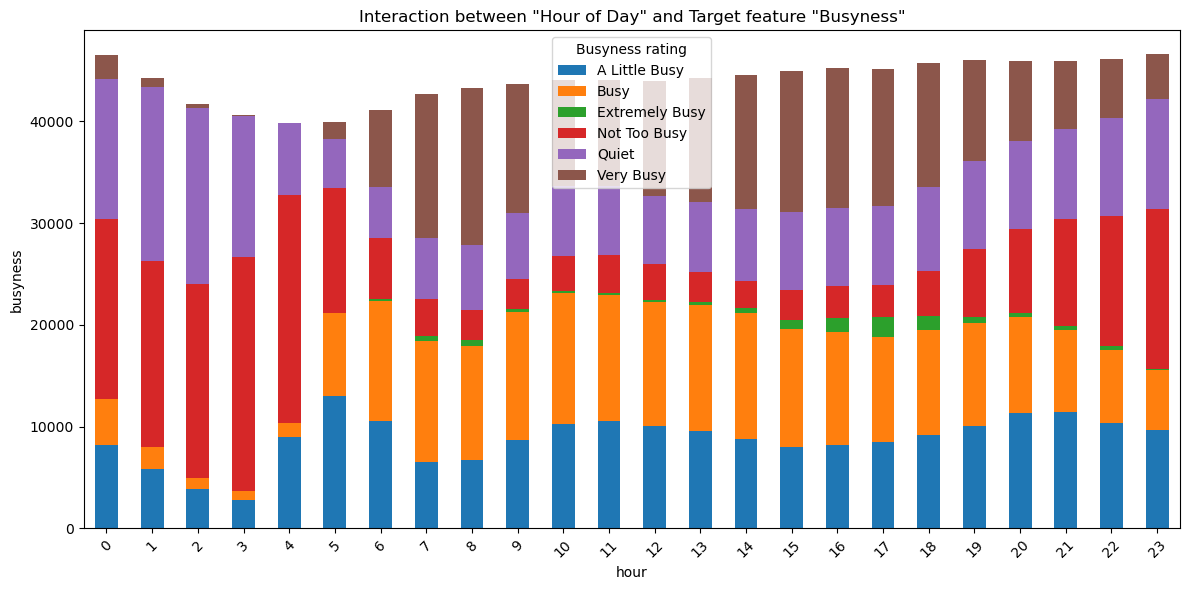

In [143]:
import matplotlib.pyplot as plt
grouped_data = train_data.groupby(['hour', 'busyness']).size().unstack(fill_value=0)

# Plot the data
grouped_data.plot(kind='bar', stacked=True, figsize=(12, 6))

plt.title('Interaction between "Hour of Day" and Target feature "Busyness"')
plt.xlabel('hour')
plt.ylabel('busyness')
plt.xticks(rotation=45)
plt.legend(title='Busyness rating')
plt.tight_layout()
plt.show()

### Plot pairwise interaction of each categorical feature with the target feature

In [146]:
# Define a function to create plots for the given feature against death_yn
def plot_busyness_categorical(feature):
   # Group the data by the feature and busyness
    group = train_data.groupby([feature, 'busyness']).size().unstack()
    
    # Plot the stacked bar plot
    group.plot(kind='bar', stacked=True, figsize=(10, 6))
    
    # Set the title and labels
    plt.title("Interaction between {} and target feature busyness".format(feature))
    plt.xlabel(feature)
    plt.ylabel("busyness")
 
    
    # Show plot
    plt.show()


In [147]:
import seaborn as sns

# Function to plot busyness for numerical features
def plot_busyness_numerical(feature):
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='busyness', y=feature, data=train_data)
    plt.title(f"Distribution of {feature} by busyness")
    plt.xlabel("busyness")
    plt.ylabel(feature)
    plt.show()

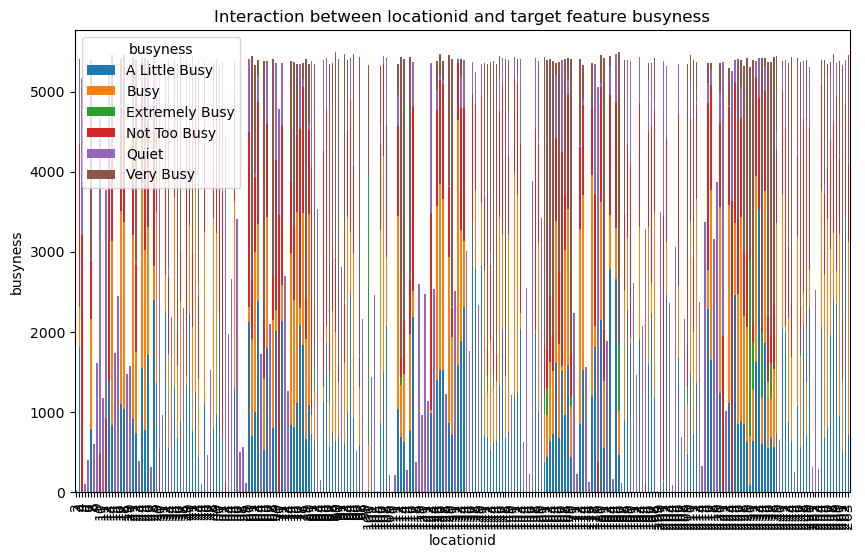

In [145]:
# Identify categorical features
categorical_features = train_data.select_dtypes('category').columns

# Plot pairwise interactions
for feature in categorical_features:
    # Exclude 'death_yn' from the loop
    if feature != 'busyness':  
        plot_busyness_categorical(feature)
        

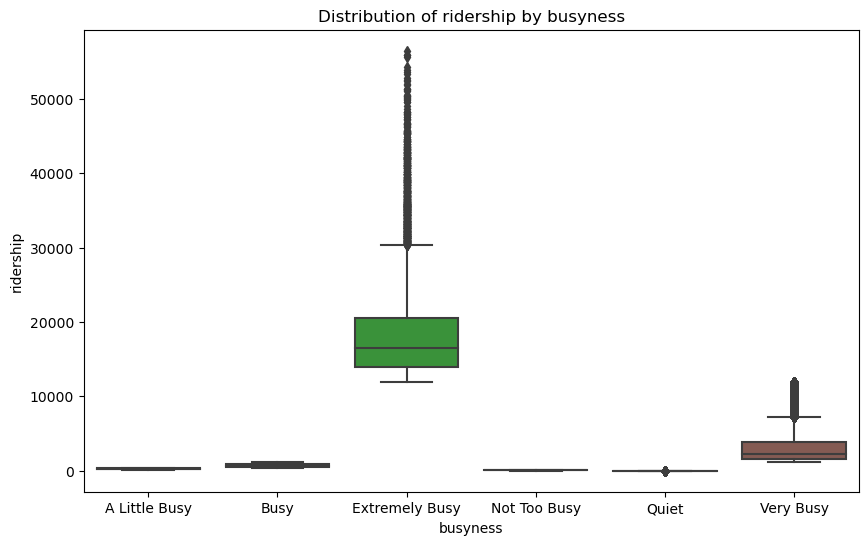

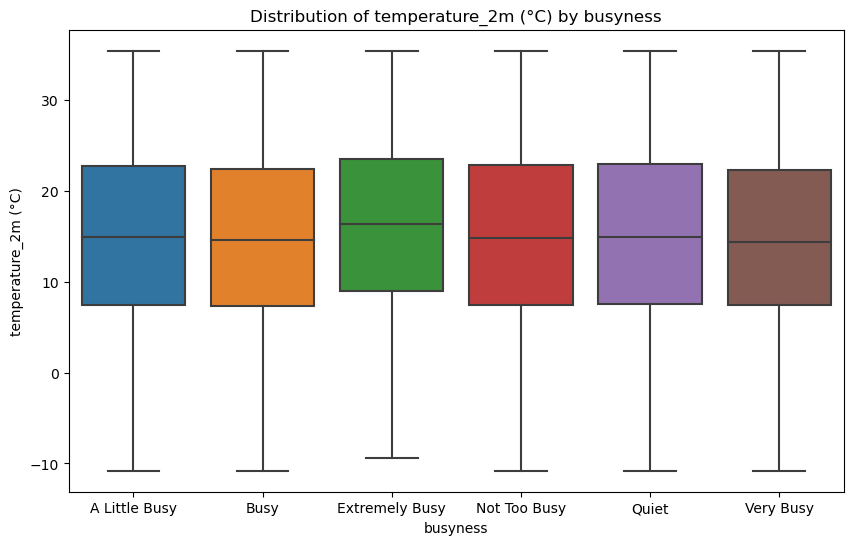

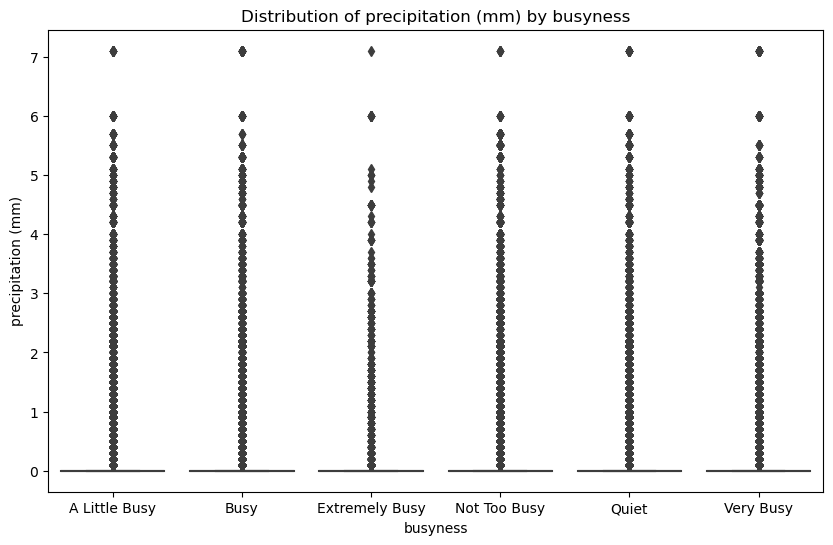

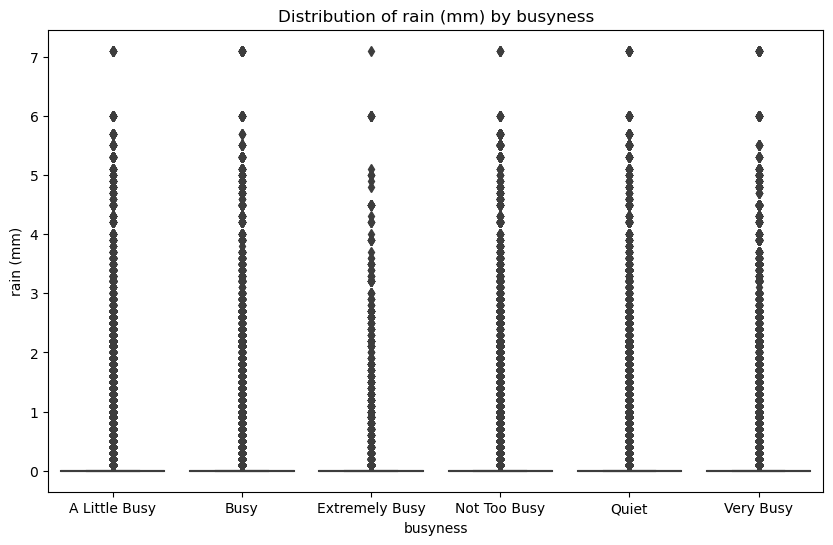

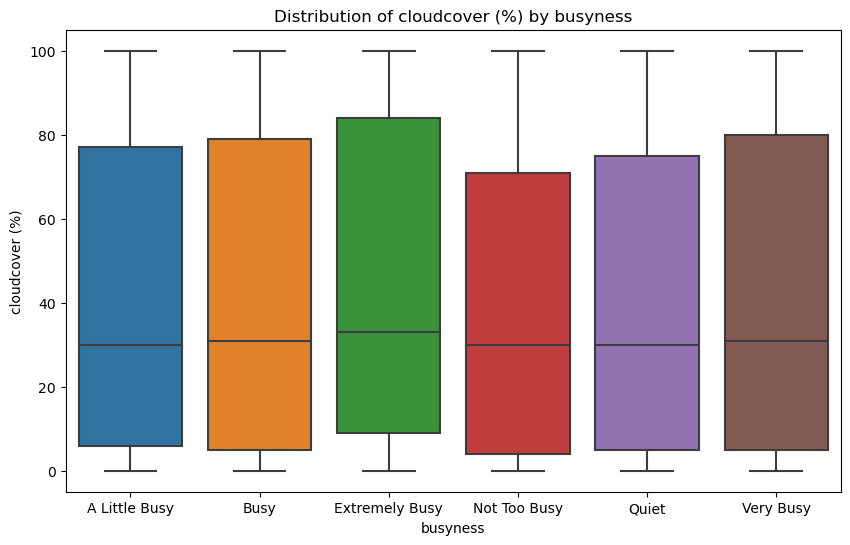

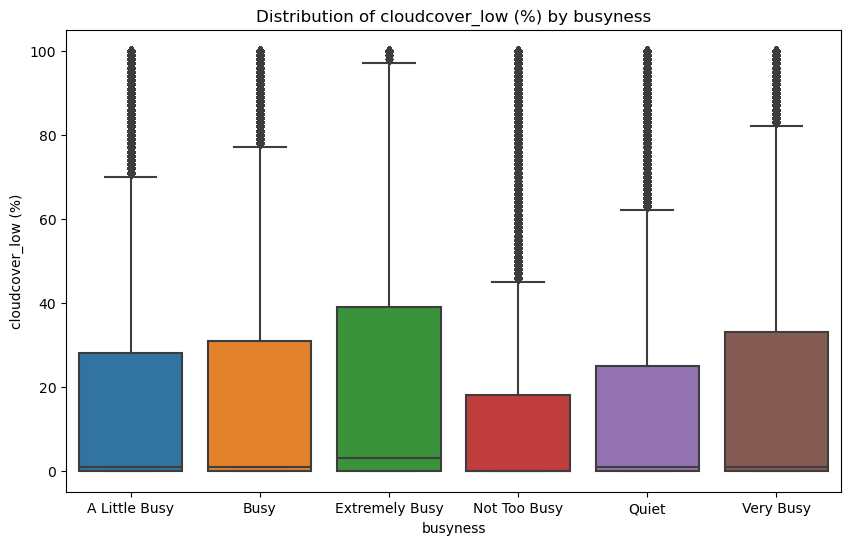

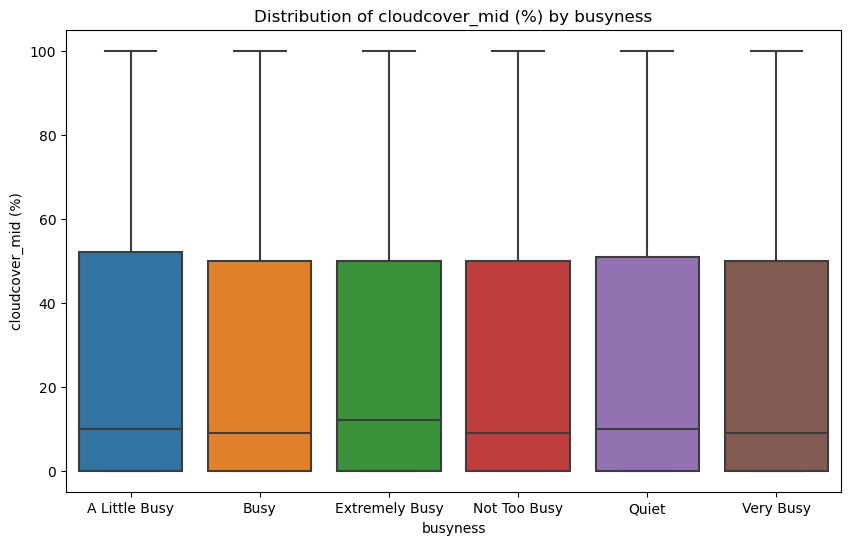

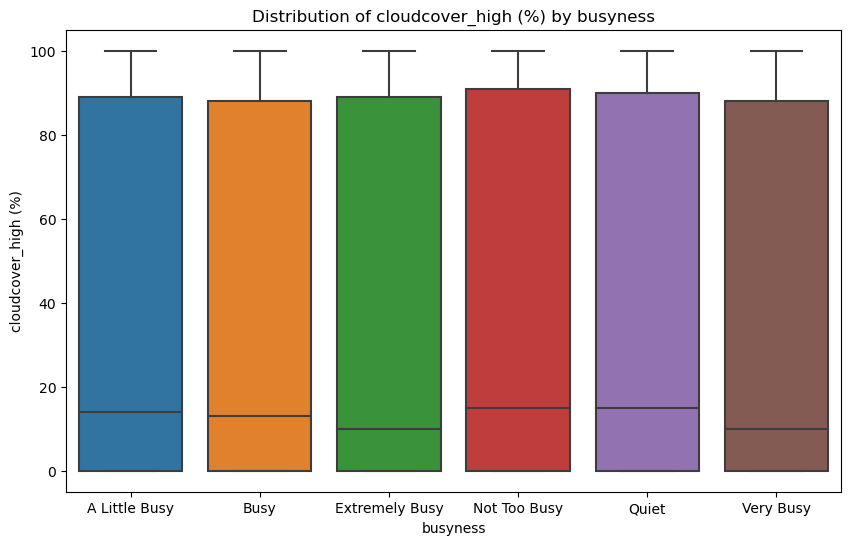

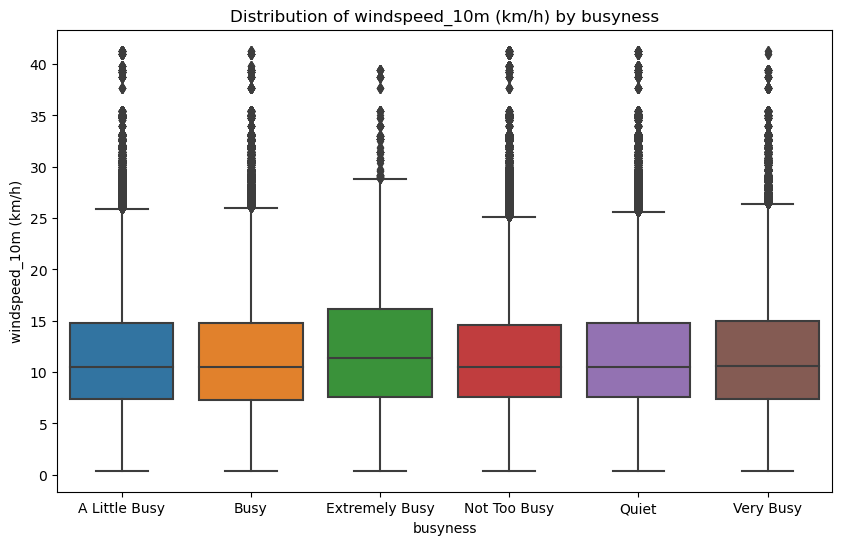

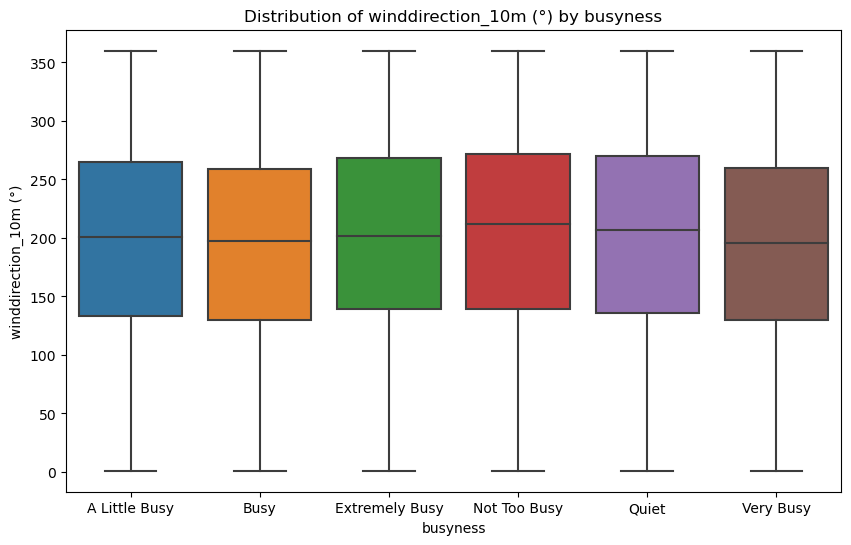

In [148]:
numerical_features = train_data.select_dtypes(include=['int64', 'float64']).columns

# Plot pairwise interactions for numerical features
for feature in numerical_features:
    plot_busyness_numerical(feature)

No seeming correlation between busyness and other numerical features. There does seem to be a correlation between busyness and hour of the day - may also be correlation with month and day of week

In [155]:
# Encode 'busyness' as numeric
label_encoder = LabelEncoder()
train_data['busyness_encoded'] = label_encoder.fit_transform(train_data['busyness'])

# Group data by location and busyness
grouped_data = train_data.groupby(['locationid', 'busyness']).mean().reset_index()

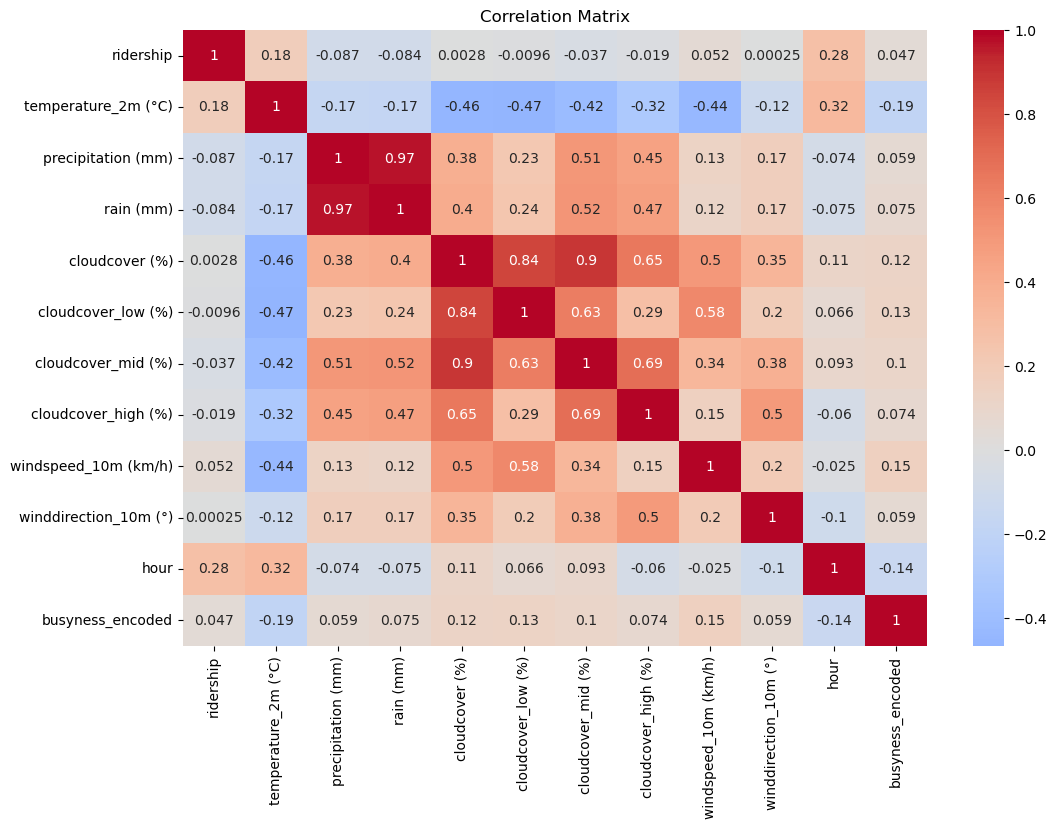

In [156]:
import numpy as np

# Select only numeric columns for correlation matrix
numeric_cols = grouped_data.select_dtypes(include=[np.number]).columns
correlation_matrix = grouped_data[numeric_cols].corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.show()

In [158]:
# Revert the 'busyness_encoded' column back to its original categorical values
train_data['busyness'] = label_encoder.inverse_transform(train_data['busyness_encoded'])
train_data.drop(columns=['busyness_encoded'], inplace=True)

train_data.head()

,locationid,ridership,time,temperature_2m (°C),precipitation (mm),rain (mm),cloudcover (%),cloudcover_low (%),cloudcover_mid (%),cloudcover_high (%),windspeed_10m (km/h),winddirection_10m (°),hour,busyness
1503737,263,327,2022-05-13 06:00:00,15.4,0.0,0.0,90.0,100.0,0.0,0.0,6.6,41.0,6,A Little Busy
457897,83,5,2022-09-25 13:00:00,15.8,0.0,0.0,72.0,0.0,73.0,95.0,7.2,267.0,13,Quiet
469138,86,25,2022-04-27 23:00:00,9.8,0.0,0.0,0.0,0.0,0.0,0.0,23.2,144.0,23,Not Too Busy
353595,68,900,2022-08-02 10:00:00,22.7,0.0,0.0,9.0,5.0,7.0,0.0,7.4,219.0,10,Busy
867754,159,925,2022-10-03 13:00:00,10.6,0.0,0.0,95.0,10.0,94.0,100.0,20.3,63.0,13,Busy


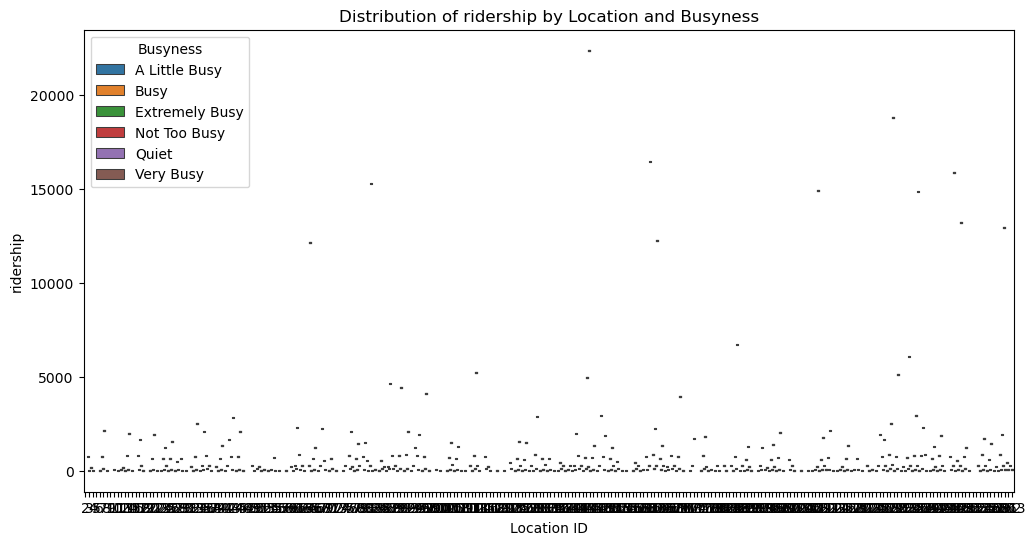

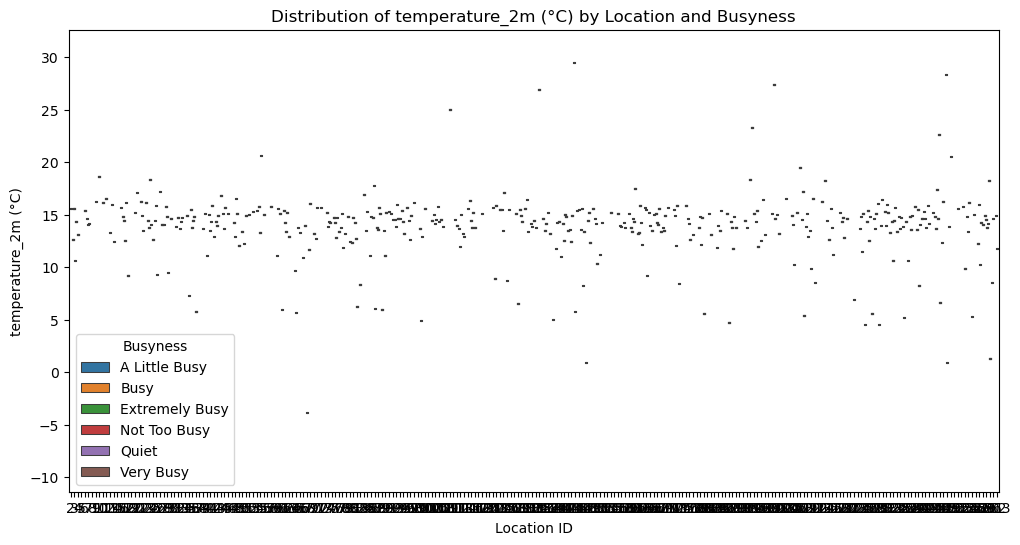

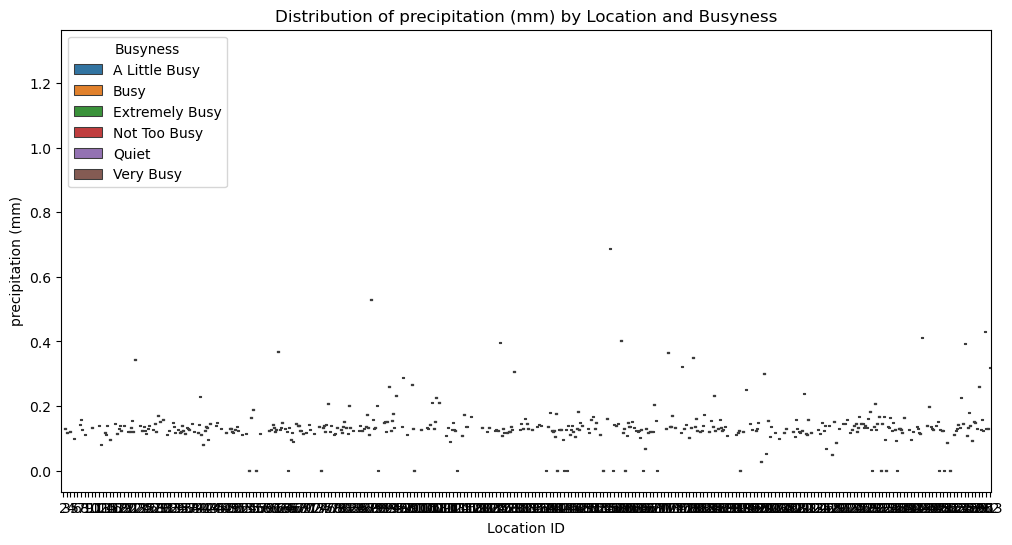

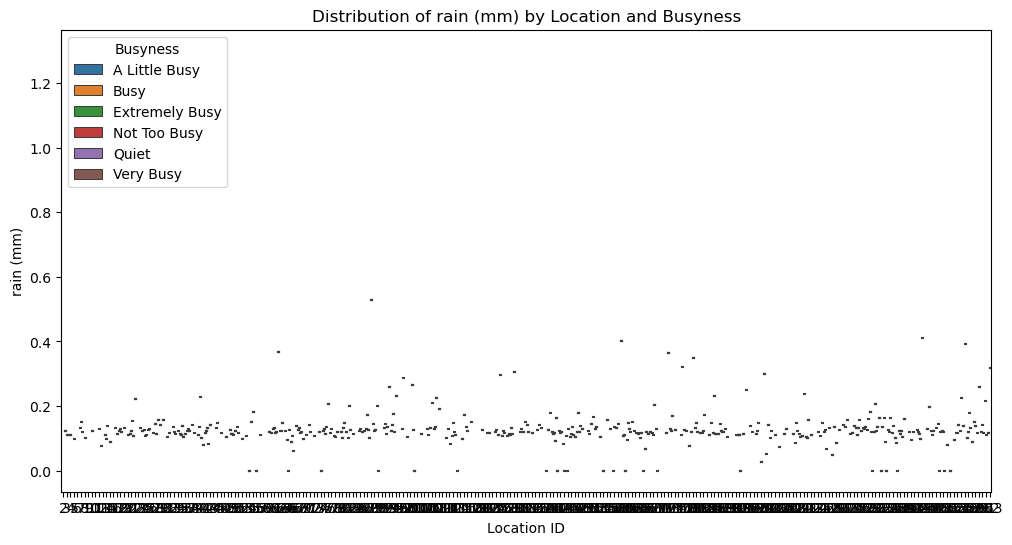

/Users/muireannoconnor/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


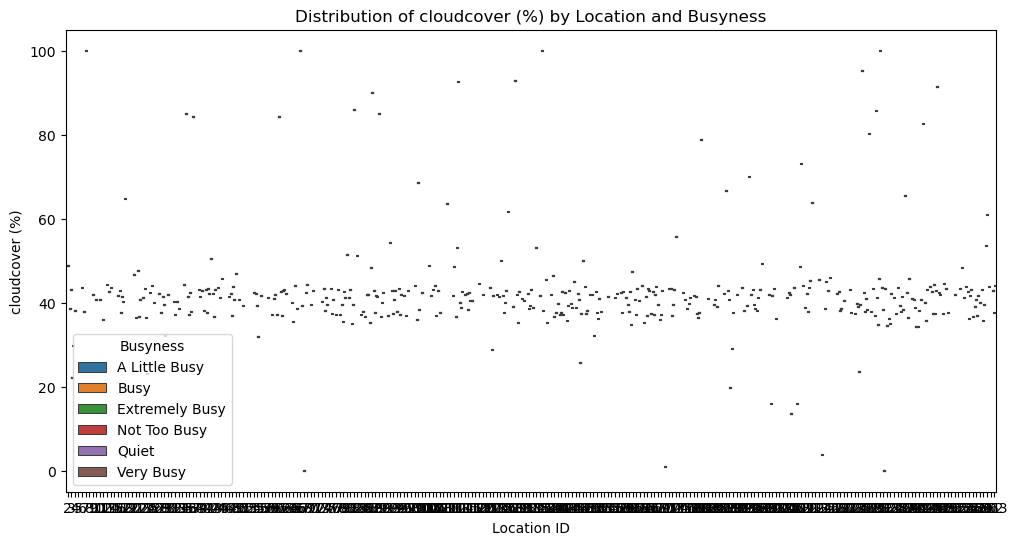

/Users/muireannoconnor/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


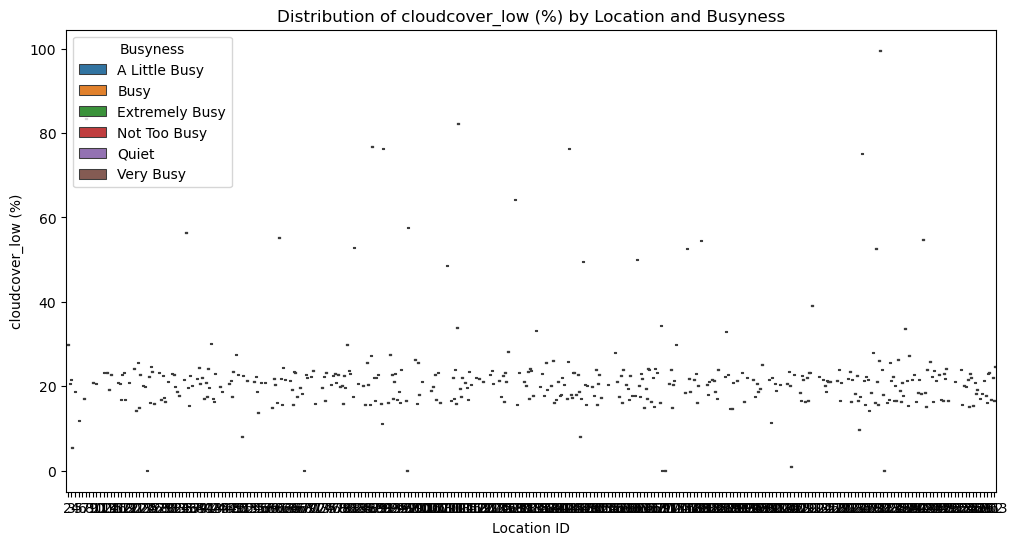

/Users/muireannoconnor/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


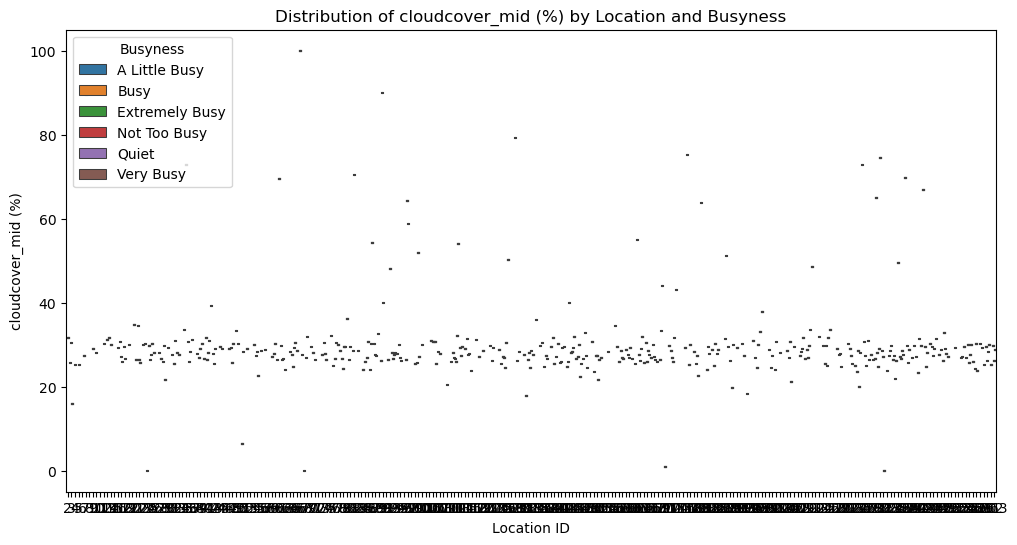

/Users/muireannoconnor/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


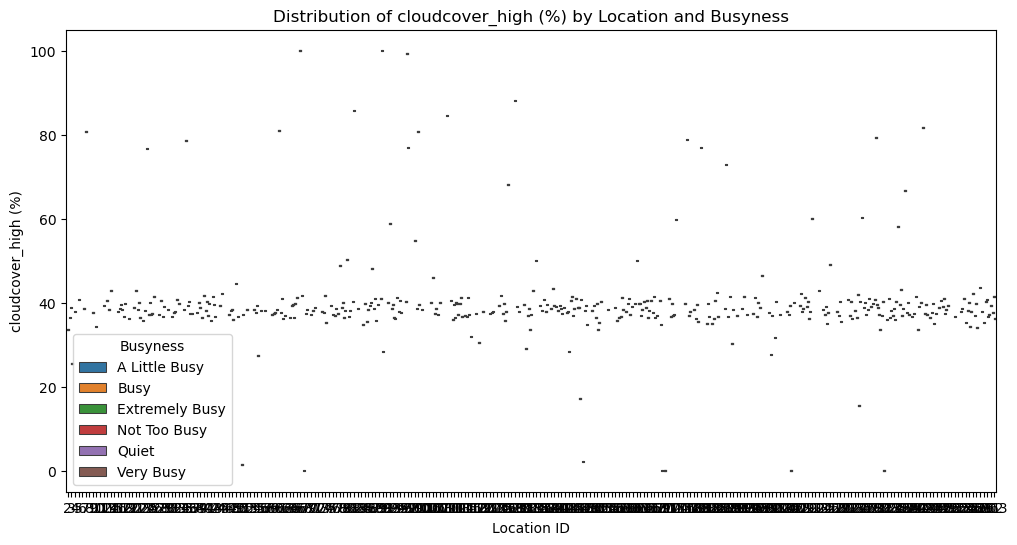

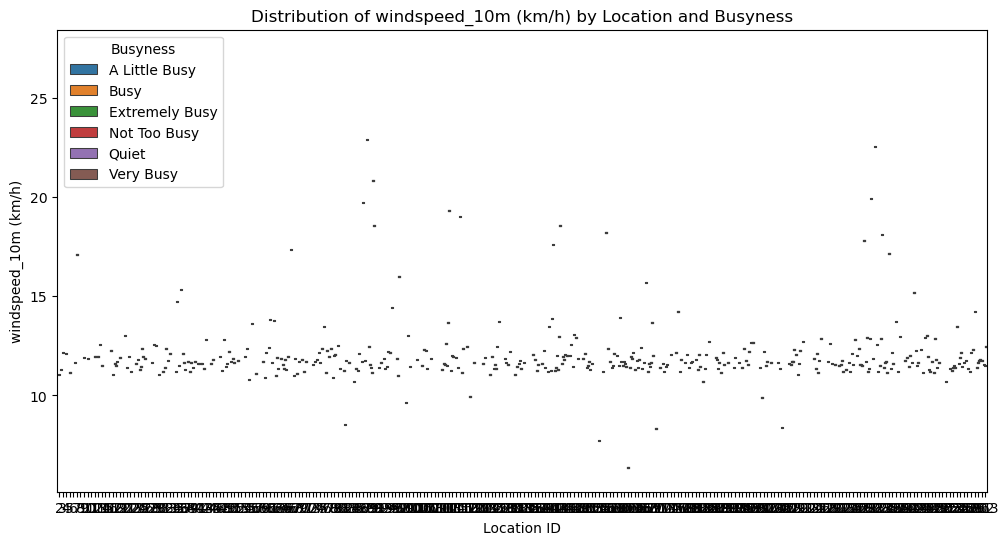

/Users/muireannoconnor/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


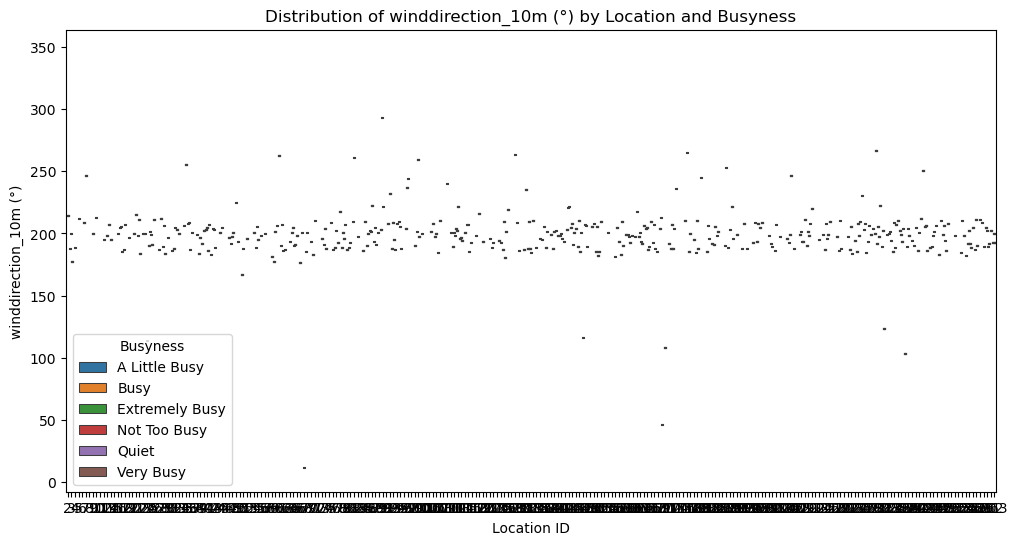

In [152]:
for feature in numerical_features:
    plt.figure(figsize=(12, 6))
    sns.boxplot(x='locationid', y=feature, hue='busyness', data=grouped_data)
    plt.title(f'Distribution of {feature} by Location and Busyness')
    plt.xlabel('Location ID')
    plt.ylabel(feature)
    plt.legend(title='Busyness')
    plt.show()

Check for correlation between day of the week and month

In [159]:
# Get day of week and month from 'time' column
train_data['day_of_week'] = train_data['time'].dt.dayofweek  # Monday=0, Sunday=6
train_data['month'] = train_data['time'].dt.month

train_data[['time', 'day_of_week', 'month']].head()


,time,day_of_week,month
1503737,2022-05-13 06:00:00,4,5
457897,2022-09-25 13:00:00,6,9
469138,2022-04-27 23:00:00,2,4
353595,2022-08-02 10:00:00,1,8
867754,2022-10-03 13:00:00,0,10


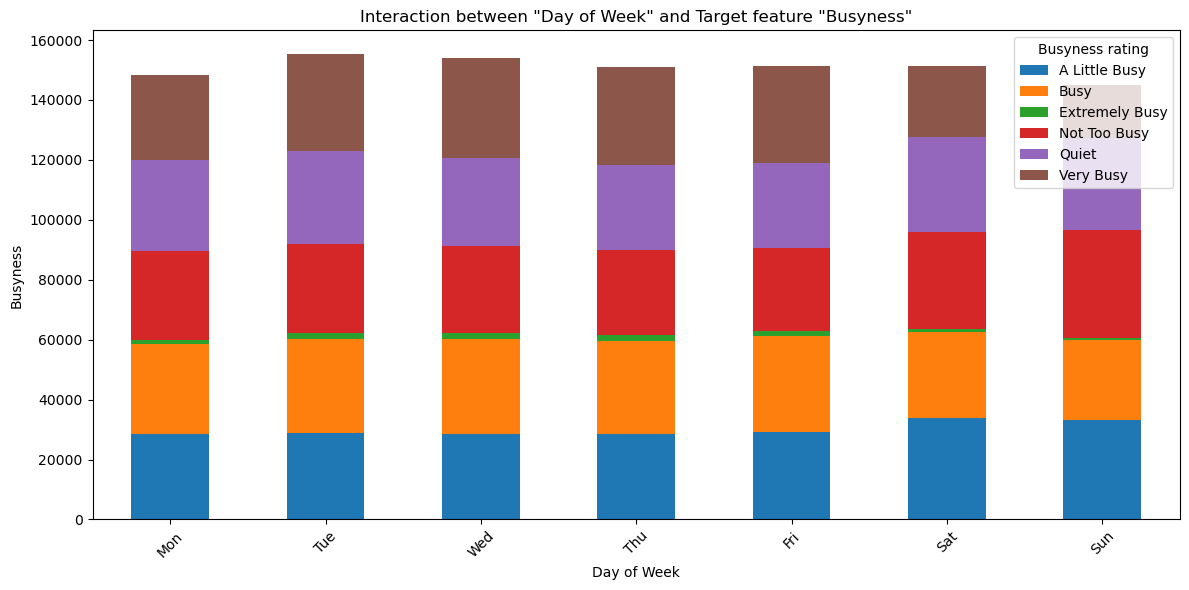

In [162]:
# Group data by day of week and busyness
grouped_day_data = train_data.groupby(['day_of_week', 'busyness']).size().unstack(fill_value=0)

# Plot the data for day of week
grouped_day_data.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Interaction between "Day of Week" and Target feature "Busyness"')
plt.xlabel('Day of Week')
plt.ylabel('Busyness')
plt.xticks(rotation=45)
plt.gca().set_xticklabels(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])  # Set labels directly on current axes
plt.legend(title='Busyness rating')
plt.tight_layout()
plt.show()

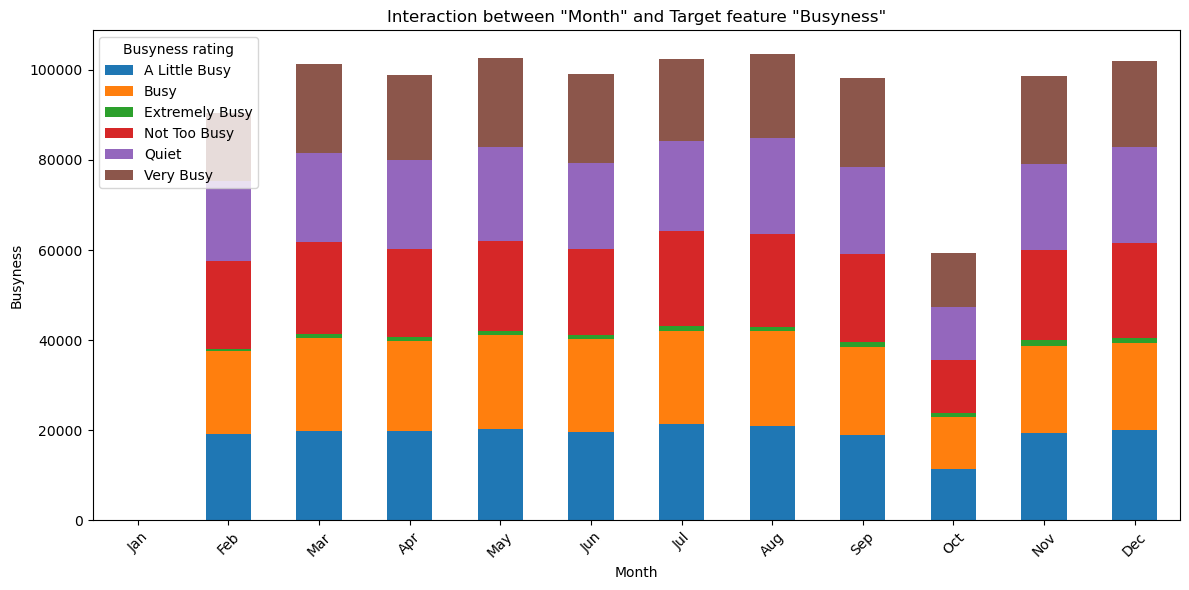

In [163]:
# Group data by month and busyness
grouped_month_data = train_data.groupby(['month', 'busyness']).size().unstack(fill_value=0)

# Plot the data for month
grouped_month_data.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Interaction between "Month" and Target feature "Busyness"')
plt.xlabel('Month')
plt.ylabel('Busyness')
plt.xticks(rotation=45)
plt.gca().set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])  # Set labels directly on current axes
plt.legend(title='Busyness rating')
plt.tight_layout()
plt.show()

## Check correlations for each individual busyness label

In [164]:
# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Encode 'busyness' into numeric values
train_data['busyness_encoded'] = label_encoder.fit_transform(train_data['busyness'])

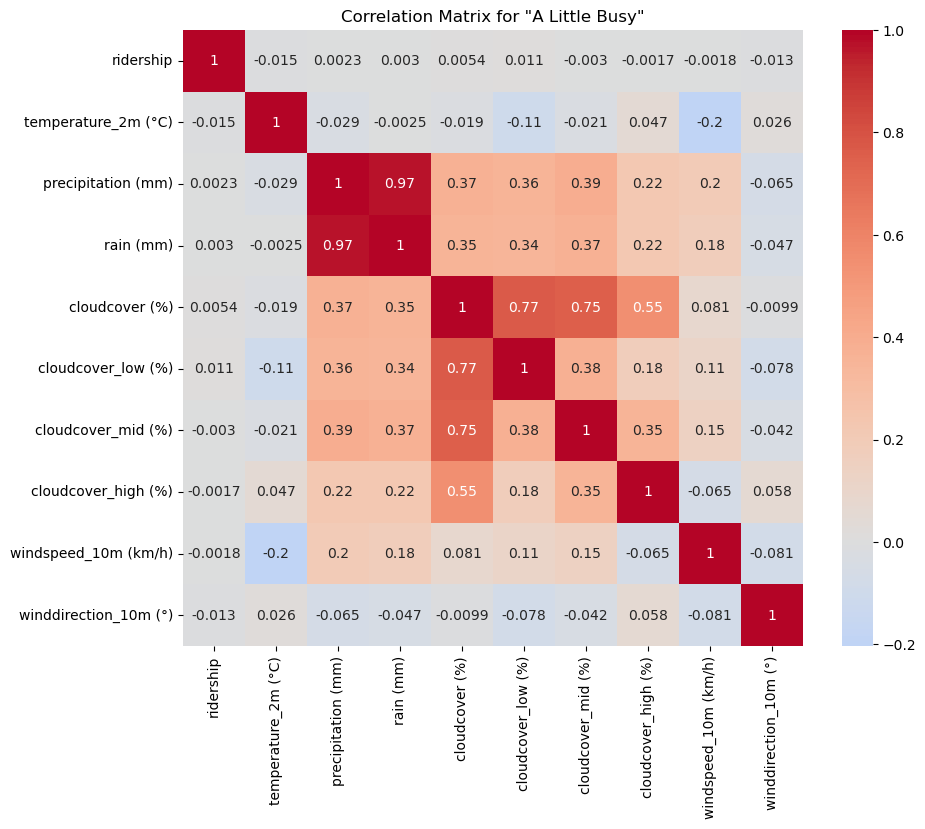

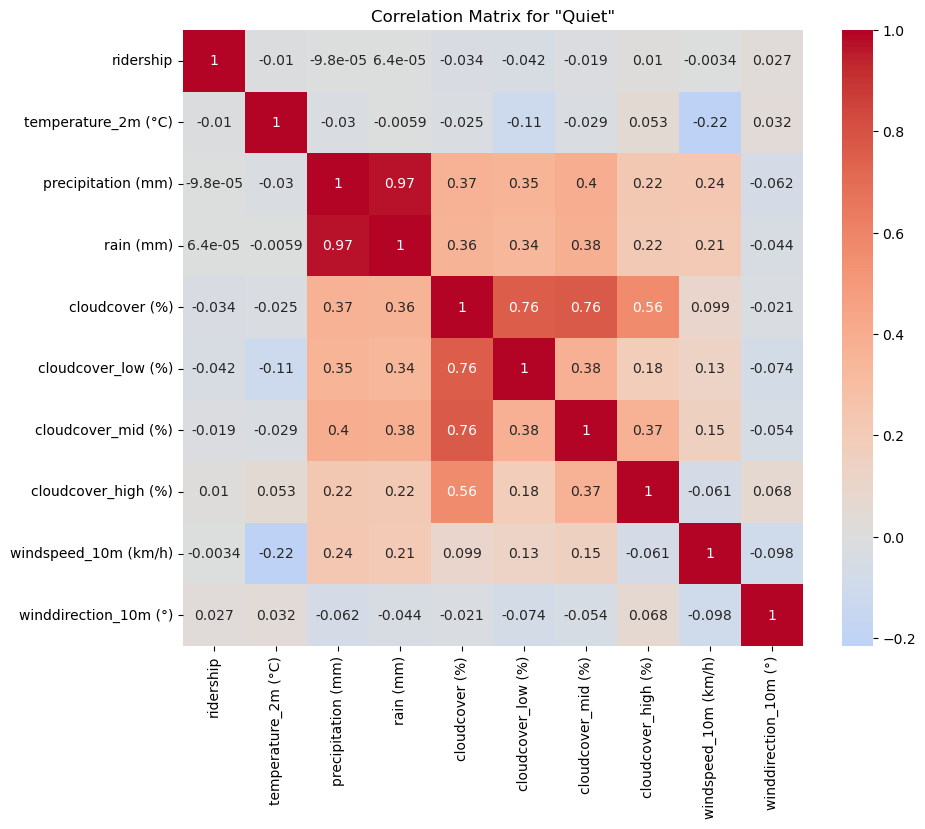

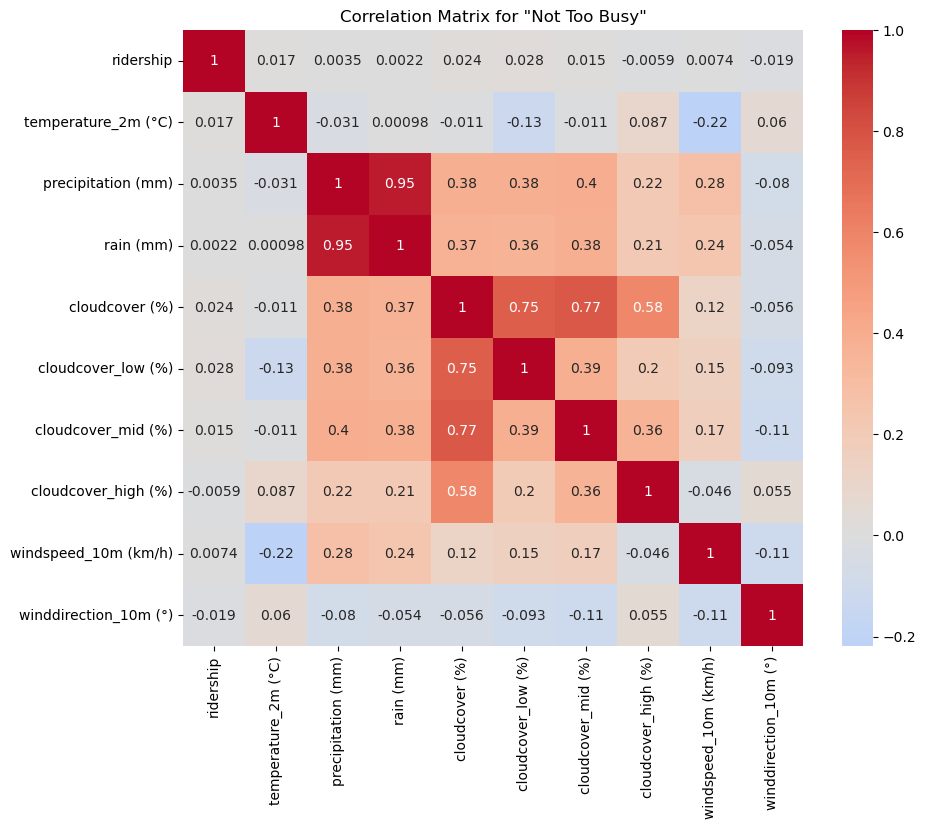

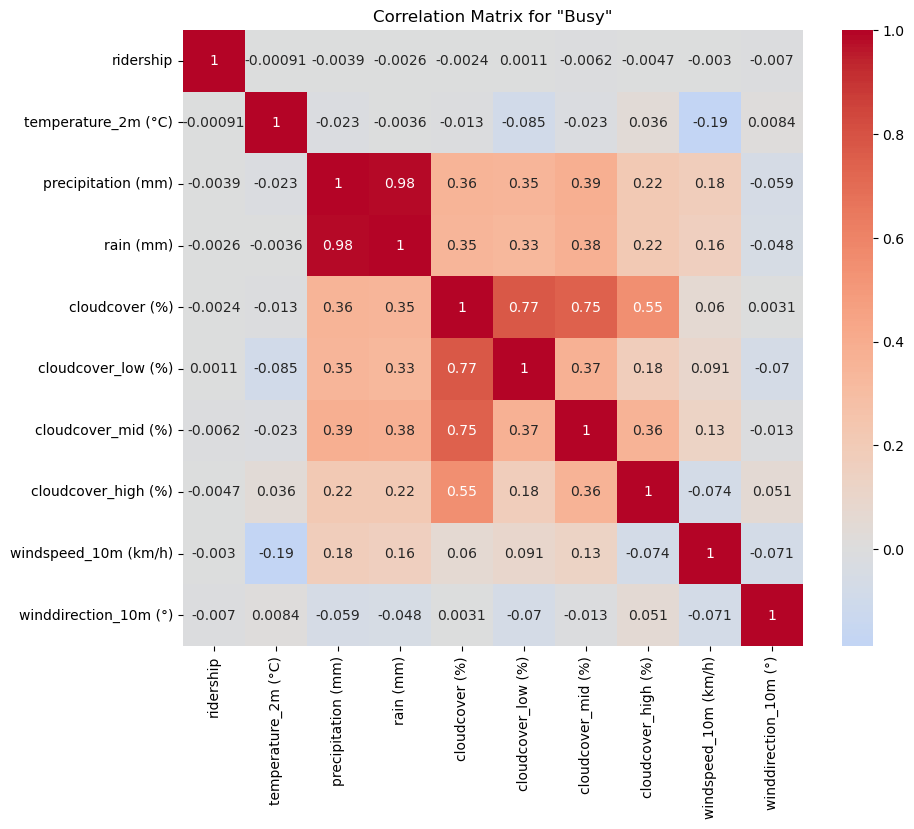

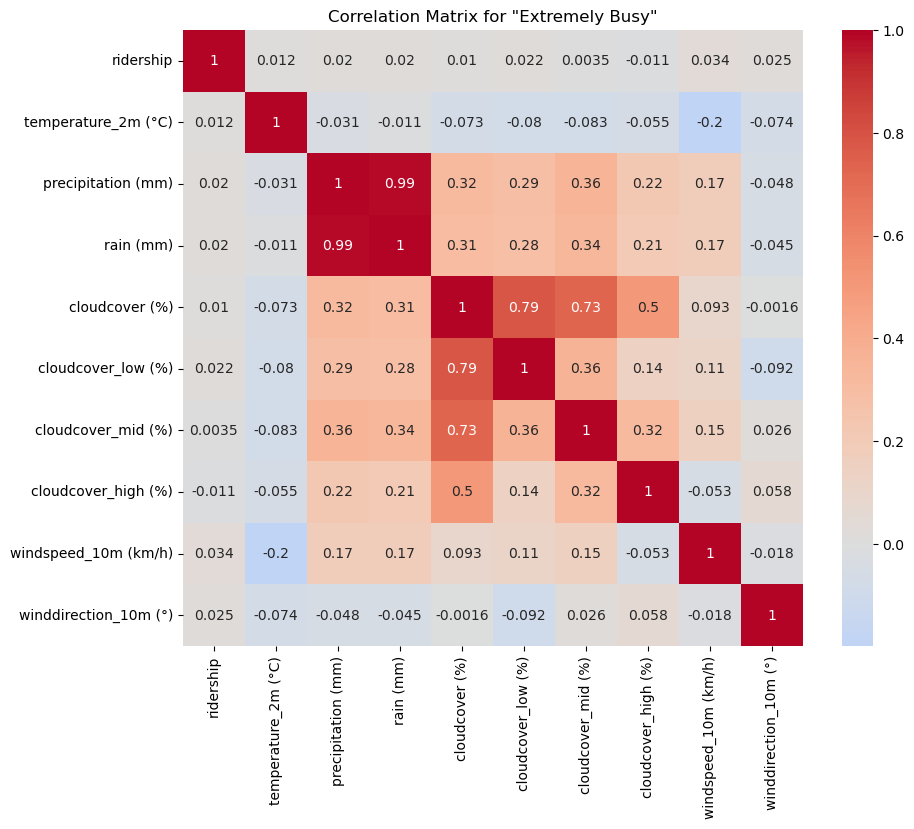

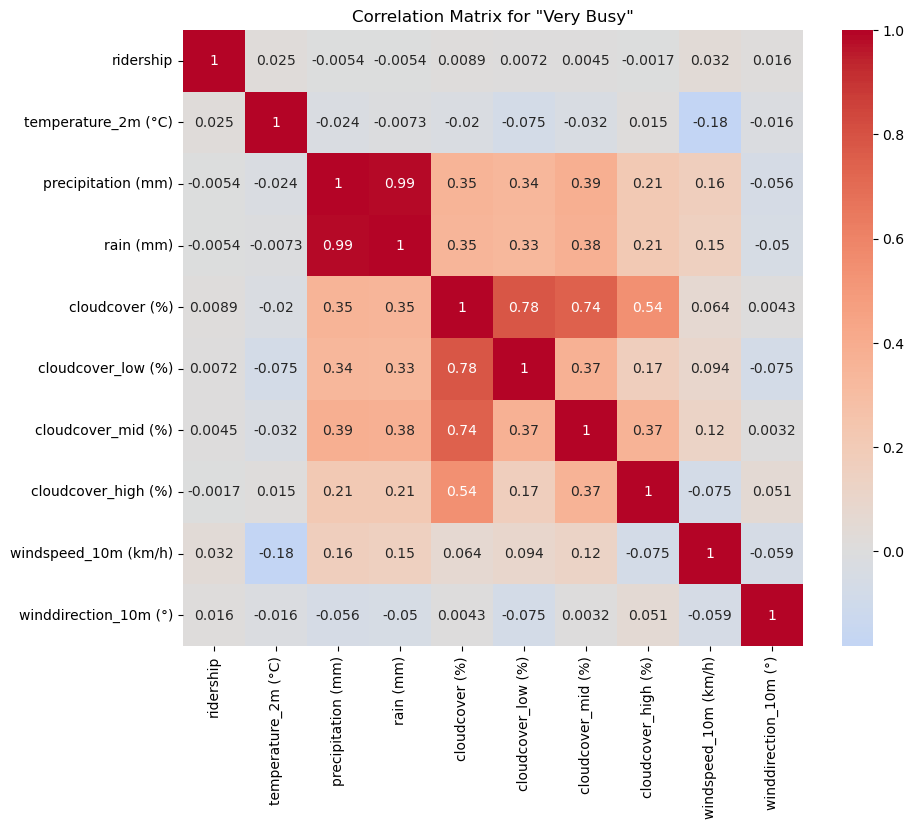

In [168]:
# List of features to calculate correlation with
numeric_features = ['ridership', 'temperature_2m (°C)', 'precipitation (mm)', 'rain (mm)', 
                    'cloudcover (%)', 'cloudcover_low (%)', 'cloudcover_mid (%)', 'cloudcover_high (%)', 
                    'windspeed_10m (km/h)', 'winddirection_10m (°)']

# Dictionary to store correlation matrices for each busyness label
correlation_matrices = {}

# Loop through each unique busyness label
for busyness_label in train_data['busyness'].unique():
    # Filter data for the current busyness label
    data_subset = train_data[train_data['busyness'] == busyness_label]
    
    # Calculate correlation matrix for the numeric features
    correlation_matrix = data_subset[numeric_features].corr()
    
    # Store correlation matrix in dictionary
    correlation_matrices[busyness_label] = correlation_matrix

# Plot each correlation matrix as a heatmap
for busyness_label, correlation_matrix in correlation_matrices.items():
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
    plt.title(f'Correlation Matrix for "{busyness_label}"')
    plt.show()